In [1]:
import numpy as np
import dicom
import sys
sys.path.append('..')
import os
from AlgoEngine.ovh import getOVH
from AlgoEngine.utils import getVolume, getContours, getImageBlock, convertROIToCTSpace
from General.testing_utils import getContourInputs
from math import sqrt
import time
start_time = time.time() # For runtime test
import matplotlib.pyplot as plt

## Inputs to Function

In [2]:
BASE_DIR = '/home/radiation/RadiationTherapyDecisionSupport/data/'
StudyID = 'UCLA_PR_6'
_, sop_ids = getImageBlock(StudyID, BASE_DIR)
n_bins = 10

ctFilenames = [fl for fl in os.listdir(BASE_DIR + StudyID) if 'CT.' in fl]
numImages = len(ctFilenames)

sampleCTImage = dicom.read_file(BASE_DIR + StudyID + '/' + ctFilenames[0])
width = sampleCTImage.Columns
height = sampleCTImage.Rows
row_spacing = float(sampleCTImage.PixelSpacing[0])
column_spacing = float(sampleCTImage.PixelSpacing[1])
slice_spacing = float(sampleCTImage.SliceThickness)

In [3]:
ROI_NAME = 'PTV'
block_shape, contour_data, image_orientation, image_position, pixel_spacing = getContourInputs(BASE_DIR, StudyID, ROI_NAME, excluding=[])
ptv_contour_block, ptv_roi_block = getContours(block_shape, contour_data, image_orientation, image_position, pixel_spacing)
ptv_contour_block = convertROIToCTSpace(ptv_contour_block, image_position, sop_ids)
ptv_roi_block = convertROIToCTSpace(ptv_roi_block, image_position, sop_ids)

In [4]:
ROI_NAME = 'Bladder'
block_shape, contour_data, image_orientation, image_position, pixel_spacing = getContourInputs(BASE_DIR, StudyID, ROI_NAME, excluding=[])
_, oar_roi_block = getContours(block_shape, contour_data, image_orientation, image_position, pixel_spacing)
oar_roi_block = convertROIToCTSpace(oar_roi_block, image_position, sop_ids)

## Function Starts Here

In [5]:
bin_vals, bin_amts = getOVH(oar_roi_block, ptv_contour_block, ptv_roi_block, pixel_spacing,
                            row_spacing, column_spacing, slice_spacing, n_bins)

## Testing

We assert than the last `bin_amts` is 1.0 (100%), and we plot an OVH histogram

In [6]:
print(bin_amts[-1] == 1.0)

False


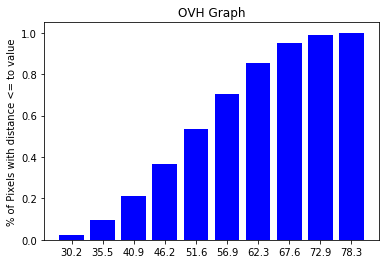

In [7]:
plt.bar(np.arange(len(bin_vals) - 1), bin_amts, align='center', color='blue')
plt.xticks(np.arange(len(bin_vals) - 1), np.around(bin_vals[1:], decimals=1))
plt.ylabel("% of Pixels with distance <= to value")
plt.title("OVH Graph")
plt.show()




In [8]:
print("Runtime of OVH function: " + str((time.time() - start_time)/float(60)) + " Minutes")

Runtime of OVH function: 1.5503344178199767 Minutes
